# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import io


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city= citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
no_of_cities = len(cities)
len(cities)
no_of_cities

633

In [3]:
city_dictionary ={
    "city": cities,
    "latitude": "",
    "humidity": "",
    "cloudiness": "",
    "windspeed":"",
    "temperature": ""
                 }    

new_cities_df = pd.DataFrame(city_dictionary)

new_cities_df.head()


,city,latitude,humidity,cloudiness,windspeed,temperature
0,kapaa,,,,,
1,hasaki,,,,,
2,bandarbeyla,,,,,
3,olhao,,,,,
4,mataura,,,,,


In [33]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"

units="imperial"
 
call_url = f"{base_url}appid={weather_api_key}&units={units}&q="    

# Use iterrows to iterate through pandas dataframe
for index, row in new_cities_df.iterrows():
 
    # Get city from df
    city = row['city']
   
    
    # Make API Call
   
    print(f"Retrieving Results for OpenWeather City Weather {index}.")
    response = requests.get(call_url + city).json()
    time.sleep(.15)
    
    # Get Results
    results = response['cod']
    
    try:
        print(f"City found is " + city + " with ID: " , response['id'] ) 
        
        new_cities_df.loc[index, 'latitude'] = response['coord']['lat']
        new_cities_df.loc[index, 'humidity'] = response['main']['humidity']
        new_cities_df.loc[index, 'cloudiness'] = response['clouds']['all']
        new_cities_df.loc[index, 'windspeed'] = response['wind']['speed']
        new_cities_df.loc[index, 'temperature'] = response['main']['temp']
        
        
    except (KeyError, IndexError):
        print("City weather not available")
        
    print("------------")    
    
    
    

Retrieving Results for OpenWeather City Weather 0.
City found is kapaa with ID:  5848280
------------
Retrieving Results for OpenWeather City Weather 1.
City found is hasaki with ID:  2112802
------------
Retrieving Results for OpenWeather City Weather 2.
City found is bandarbeyla with ID:  64814
------------
Retrieving Results for OpenWeather City Weather 3.
City found is olhao with ID:  2265447
------------
Retrieving Results for OpenWeather City Weather 4.
City found is mataura with ID:  6201424
------------
Retrieving Results for OpenWeather City Weather 5.
City found is chuy with ID:  3443061
------------
Retrieving Results for OpenWeather City Weather 6.
City found is narsaq with ID:  3421719
------------
Retrieving Results for OpenWeather City Weather 8.
City found is faanui with ID:  4034551
------------
Retrieving Results for OpenWeather City Weather 9.
City found is ust-nera with ID:  2120048
------------
Retrieving Results for OpenWeather City Weather 11.
City found is gamba

City found is hofn with ID:  2630299
------------
Retrieving Results for OpenWeather City Weather 84.
City found is horizonte with ID:  3398450
------------
Retrieving Results for OpenWeather City Weather 85.
City found is quatre cocos with ID:  1106643
------------
Retrieving Results for OpenWeather City Weather 86.
City found is albino with ID:  6540342
------------
Retrieving Results for OpenWeather City Weather 87.
City found is hobart with ID:  2163355
------------
Retrieving Results for OpenWeather City Weather 88.
City found is hithadhoo with ID:  1282256
------------
Retrieving Results for OpenWeather City Weather 89.
City found is avarua with ID:  4035715
------------
Retrieving Results for OpenWeather City Weather 90.
City found is arraial do cabo with ID:  3471451
------------
Retrieving Results for OpenWeather City Weather 91.
City found is buin with ID:  3897774
------------
Retrieving Results for OpenWeather City Weather 92.
City found is samarai with ID:  2132606
-------

City found is champerico with ID:  3598787
------------
Retrieving Results for OpenWeather City Weather 169.
City found is texarkana with ID:  4736096
------------
Retrieving Results for OpenWeather City Weather 170.
City found is kieta with ID:  2094027
------------
Retrieving Results for OpenWeather City Weather 171.
City found is victoria with ID:  1819729
------------
Retrieving Results for OpenWeather City Weather 172.
City found is san policarpo with ID:  1688696
------------
Retrieving Results for OpenWeather City Weather 173.
City found is cabedelo with ID:  3404558
------------
Retrieving Results for OpenWeather City Weather 174.
City found is umm kaddadah with ID:  364933
------------
Retrieving Results for OpenWeather City Weather 175.
City found is santa rosa with ID:  1687894
------------
Retrieving Results for OpenWeather City Weather 176.
City found is coihaique with ID:  3894426
------------
Retrieving Results for OpenWeather City Weather 177.
City found is new norfolk 

City found is coquimbo with ID:  3893629
------------
Retrieving Results for OpenWeather City Weather 253.
City found is saint-joseph with ID:  6690296
------------
Retrieving Results for OpenWeather City Weather 254.
City found is linjiang with ID:  2036069
------------
Retrieving Results for OpenWeather City Weather 255.
City found is zemio with ID:  235826
------------
Retrieving Results for OpenWeather City Weather 256.
City found is ayr with ID:  2656708
------------
Retrieving Results for OpenWeather City Weather 257.
City found is necochea with ID:  3430443
------------
Retrieving Results for OpenWeather City Weather 258.
City found is noyabrsk with ID:  1496503
------------
Retrieving Results for OpenWeather City Weather 259.
City found is doha with ID:  290030
------------
Retrieving Results for OpenWeather City Weather 260.
City found is tucupita with ID:  3625929
------------
Retrieving Results for OpenWeather City Weather 261.
City found is road town with ID:  3577430
-----

City found is kruisfontein with ID:  986717
------------
Retrieving Results for OpenWeather City Weather 340.
City found is egvekinot with ID:  4031742
------------
Retrieving Results for OpenWeather City Weather 342.
City found is touros with ID:  3386213
------------
Retrieving Results for OpenWeather City Weather 343.
City found is trairi with ID:  3386177
------------
Retrieving Results for OpenWeather City Weather 344.
City found is rajgurunagar with ID:  1258859
------------
Retrieving Results for OpenWeather City Weather 345.
City found is yumen with ID:  1528998
------------
Retrieving Results for OpenWeather City Weather 348.
City found is edd with ID:  338345
------------
Retrieving Results for OpenWeather City Weather 349.
City found is the pas with ID:  6164499
------------
Retrieving Results for OpenWeather City Weather 350.
City found is port-gentil with ID:  2396518
------------
Retrieving Results for OpenWeather City Weather 351.
City found is alofi with ID:  4036284
--

City found is mitu with ID:  3674676
------------
Retrieving Results for OpenWeather City Weather 426.
City found is corinth with ID:  259289
------------
Retrieving Results for OpenWeather City Weather 427.
City found is port-cartier with ID:  6111696
------------
Retrieving Results for OpenWeather City Weather 428.
City found is san angelo with ID:  5530022
------------
Retrieving Results for OpenWeather City Weather 429.
City found is cap-aux-meules with ID:  5915327
------------
Retrieving Results for OpenWeather City Weather 430.
City found is tura with ID:  1254046
------------
Retrieving Results for OpenWeather City Weather 431.
City found is yaring with ID:  1604771
------------
Retrieving Results for OpenWeather City Weather 432.
City found is husavik with ID:  2629833
------------
Retrieving Results for OpenWeather City Weather 433.
City found is vila franca do campo with ID:  3372472
------------
Retrieving Results for OpenWeather City Weather 434.
City found is paamiut with

City found is mahajanga with ID:  1062663
------------
Retrieving Results for OpenWeather City Weather 511.
City found is chateauroux with ID:  3026204
------------
Retrieving Results for OpenWeather City Weather 512.
City found is bardiyah with ID:  80509
------------
Retrieving Results for OpenWeather City Weather 513.
City found is sobolevo with ID:  525426
------------
Retrieving Results for OpenWeather City Weather 514.
City found is kailua with ID:  5847486
------------
Retrieving Results for OpenWeather City Weather 515.
City found is redcar with ID:  2639563
------------
Retrieving Results for OpenWeather City Weather 516.
City found is smithers with ID:  6149996
------------
Retrieving Results for OpenWeather City Weather 517.
City found is tibagi with ID:  3446550
------------
Retrieving Results for OpenWeather City Weather 519.
City found is pochutla with ID:  3517970
------------
Retrieving Results for OpenWeather City Weather 520.
City found is acurenam with ID:  2310533
-

City found is broken hill with ID:  2173911
------------
Retrieving Results for OpenWeather City Weather 597.
City found is ko samui with ID:  1154689
------------
Retrieving Results for OpenWeather City Weather 598.
City found is olafsvik with ID:  3414079
------------
Retrieving Results for OpenWeather City Weather 599.
City found is oistins with ID:  3373652
------------
Retrieving Results for OpenWeather City Weather 600.
City found is rio pomba with ID:  3451094
------------
Retrieving Results for OpenWeather City Weather 601.
City found is broome with ID:  5110365
------------
Retrieving Results for OpenWeather City Weather 602.
City found is denpasar with ID:  1645528
------------
Retrieving Results for OpenWeather City Weather 603.
City found is pryazha with ID:  504409
------------
Retrieving Results for OpenWeather City Weather 605.
City found is xining with ID:  1788852
------------
Retrieving Results for OpenWeather City Weather 606.
City found is nanchang with ID:  1800163

In [35]:
new_cities_df

,city,latitude,humidity,cloudiness,windspeed,temperature
0,kapaa,22.0752,59.0,100.0,2.71,69.12
1,hasaki,35.7333,40.0,0.0,14.88,35.58
2,bandarbeyla,9.4942,80.0,46.0,14.05,77.04
3,olhao,37.0286,63.0,0.0,8.05,64.29
4,mataura,-46.1927,99.0,37.0,1.41,59.49
...,...,...,...,...,...,...
628,sistranda,63.7256,62.0,100.0,11.32,30.16
629,tabas,33.5959,24.0,62.0,1.54,51.98
630,jinchang,38.4953,38.0,45.0,2.21,19.80
631,pangnirtung,66.1451,87.0,29.0,3.98,-27.65


In [36]:
#Removing cities that were not found with 404 Error
nan_value = float("NaN")
new_cities_df.replace("", nan_value, inplace=True)

new_cities_df.dropna(subset = ["latitude"], inplace=True)
new_cities_df

,city,latitude,humidity,cloudiness,windspeed,temperature
0,kapaa,22.0752,59.0,100.0,2.71,69.12
1,hasaki,35.7333,40.0,0.0,14.88,35.58
2,bandarbeyla,9.4942,80.0,46.0,14.05,77.04
3,olhao,37.0286,63.0,0.0,8.05,64.29
4,mataura,-46.1927,99.0,37.0,1.41,59.49
...,...,...,...,...,...,...
628,sistranda,63.7256,62.0,100.0,11.32,30.16
629,tabas,33.5959,24.0,62.0,1.54,51.98
630,jinchang,38.4953,38.0,45.0,2.21,19.80
631,pangnirtung,66.1451,87.0,29.0,3.98,-27.65


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
# using the savetxt 
# from the numpy module

np.savetxt("City_Data.csv", 
               new_cities_df,
               delimiter =", ", 
               encoding='utf-8',     
               fmt ='% s')



## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [67]:
#check if there are any cities with >100% humidity
humidity_check = new_cities_df["humidity"].describe(include = "all")
print("The maximum humidity value is 100, so there is no humidity value over 100 in our data set")
humidity_check

 

The maximum humidity value is 100, so there is no humidity value over 100 in our data set


count    574.000000
mean      71.874564
std       22.132355
min        6.000000
25%       61.000000
50%       77.000000
75%       88.000000
max      100.000000
Name: humidity, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

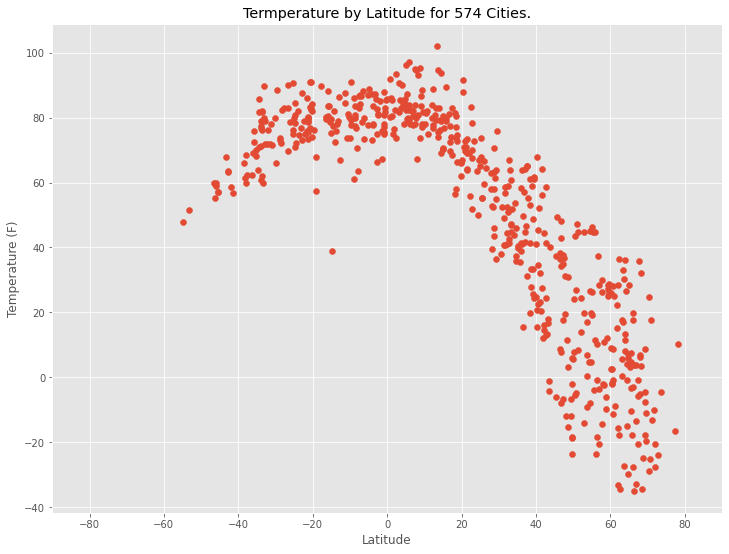

In [39]:
# Using ggplot
plt.style.use('ggplot')

# Manage the size of the plot
fig_size = plt.rcParams["figure.figsize"] # current plot size
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size # manage plot size


# Print scatter plot
plt.scatter(new_cities_df["latitude"], new_cities_df["temperature"])
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.xlim(-90,90)
plt.title(f"Termperature by Latitude for {len(new_cities_df)} Cities.")

         
plt.savefig("Temp_VS_Lat.png")
 

In [ ]:
# This plot is showing the temperatures in random cities selected across the globe in late January based
# on the cities latitude.  The analysis # (as expected) that the temperatures gradually decrease in both the
# Northern and Southern hemisphere as you move away from the equator between 40 degrees latitude, and then
# decrease significantly in the Northen Hemisphere where they are experiencing winter.  
# Would expect to see a similar tail to the left if this was run in July in the Southern Hemisphere.

## Latitude vs. Humidity Plot

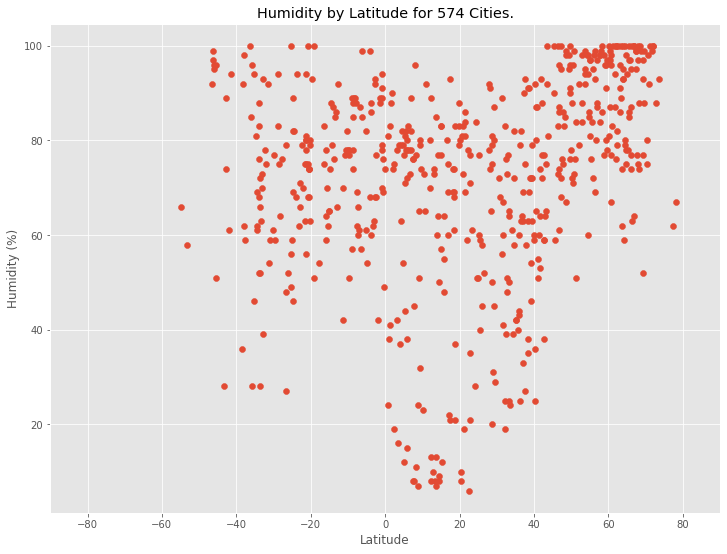

In [45]:
# Using ggplot
plt.style.use('ggplot')

# Manage the size of the plot
fig_size = plt.rcParams["figure.figsize"] # current plot size
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size # manage plot size

# Print scatter plot
plt.scatter(new_cities_df["latitude"], new_cities_df["humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90,90)
plt.title(f"Humidity by Latitude for {len(new_cities_df)} Cities.")

         
plt.savefig("Humidity_VS_Lat.png")




In [ ]:
# This chart is showing percent humidity by latitude for random cities selected across the globe.  It's  interesting 
# in that that most of the humidity values are in the 60 to 100% range with a cluster of values near 100% in the 
# Norther latutudes in the winter. This makes sense because the potential amount of water air can hold is lower at 
# lower temperatures so the denominator in the relative humidity equation is decreasing as the latitude increases.

## Latitude vs. Cloudiness Plot

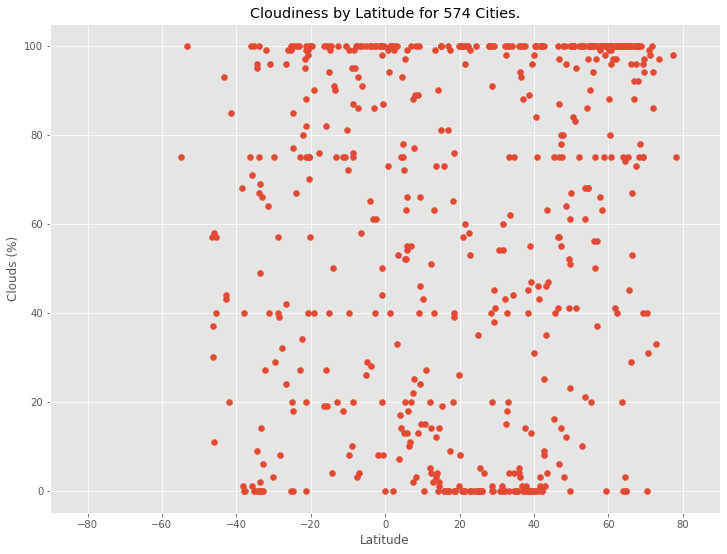

In [46]:
# Using ggplot
plt.style.use('ggplot')

# Manage the size of the plot
fig_size = plt.rcParams["figure.figsize"] # current plot size
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size # manage plot size

# Print scatter plot

plt.scatter(new_cities_df["latitude"], new_cities_df["cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Clouds (%)")
plt.xlim(-90,90)
plt.title(f"Cloudiness by Latitude for {len(new_cities_df)} Cities.")

         
plt.savefig("Cloud_VS_Lat.png")


In [ ]:
# The chart is measuring the percentage of clouds in the sky across randomly selected cities of different latitude. 
# One thing to note is that the results cluster on the upper and lower bounds which makes sense in that in many 
# cities on any given day given the weather there can be no clouds or complete cloud cover.

## Latitude vs. Wind Speed Plot

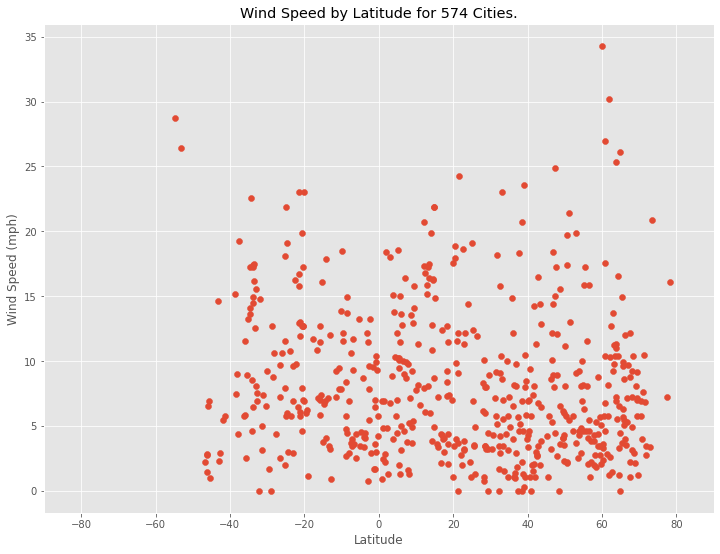

In [60]:
# Using ggplot 
plt.style.use('ggplot')

# Manage the size of the plot
fig_size = plt.rcParams["figure.figsize"] # current plot size
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size # manage plot size

# Print scatter plot
plt.scatter(new_cities_df["latitude"], new_cities_df["windspeed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-90,90)
plt.title(f"Wind Speed by Latitude for {len(new_cities_df)} Cities.")

         
plt.savefig("Wind_VS_Lat.png")
 

In [ ]:
# This chart is measureing wind speed for randomly selected cities across the globe.  It's showing that wind speeds
# tend to be between 0 and 10 mph across the globe and the season, summer or winter doesn't appear to have much of an
# impact on winds.

## Linear Regression

In [43]:
# Generate North/South Hemi DF

# Southern cities

south_cities = new_cities_df.loc[new_cities_df["latitude"] <= 0]
south_cities_ct = len(south_cities)


# Northern cities

north_cities = new_cities_df.loc[new_cities_df["latitude"] > 0]
north_cities_ct = len(north_cities)

#north_cities
north_cities
#print("There are {} cities in the northern hemisphere out of {} cities total, representing {:.1%} of all cities in the data set."
#     .format(northern_cities_count, city_left_count, (northern_cities_count/city_left_count)))



,city,latitude,humidity,cloudiness,windspeed,temperature
0,kapaa,22.0752,59.0,100.0,2.71,69.12
1,hasaki,35.7333,40.0,0.0,14.88,35.58
2,bandarbeyla,9.4942,80.0,46.0,14.05,77.04
3,olhao,37.0286,63.0,0.0,8.05,64.29
6,narsaq,60.9167,83.0,100.0,17.56,24.93
...,...,...,...,...,...,...
628,sistranda,63.7256,62.0,100.0,11.32,30.16
629,tabas,33.5959,24.0,62.0,1.54,51.98
630,jinchang,38.4953,38.0,45.0,2.21,19.80
631,pangnirtung,66.1451,87.0,29.0,3.98,-27.65


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

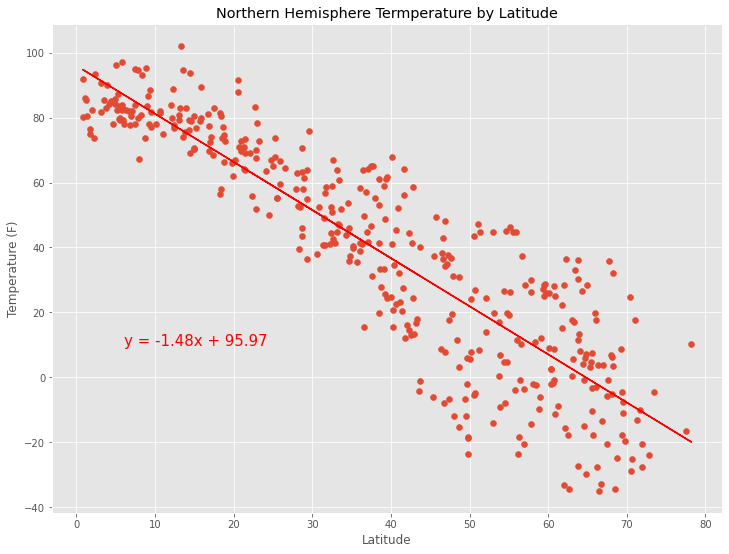

In [62]:
# Perform Regression and Plot Results

x_values = north_cities["latitude"] 
y_values = north_cities["temperature"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Print the Regression formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Northern Hemisphere Termperature by Latitude")

plt.savefig("North Temp VS Lat Reg.png")
 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

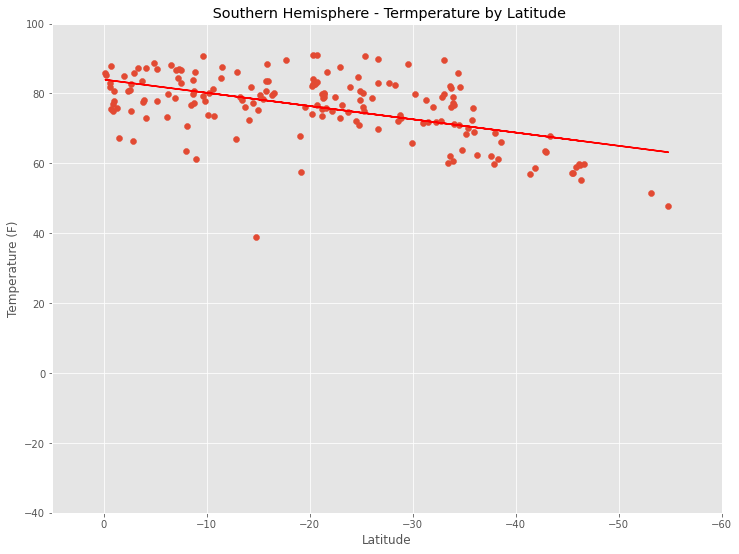

In [78]:
# Perform Regression and Plot Results

x_values = south_cities["latitude"] 
y_values = south_cities["temperature"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Print the Regression formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f" Southern Hemisphere - Termperature by Latitude")
plt.xlim([5, -60])
plt.ylim([-40,100])

plt.savefig("South Temp VS Lat Reg.png")

In [ ]:
# The first thing I noticed is that the overall correlation between temperature and latitude is stong in both the
# Northern and Southern Hemispheres, as expected.  I plotted the output on the same scale so I could better see
# any differences in the regression, as before doing so, the regression looked stonger in the Norther Hemisphere. 
# Showing the results on the same Y axix scale shows that both Norther and Southern Hemisphere correlations appear 
# equally strong.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

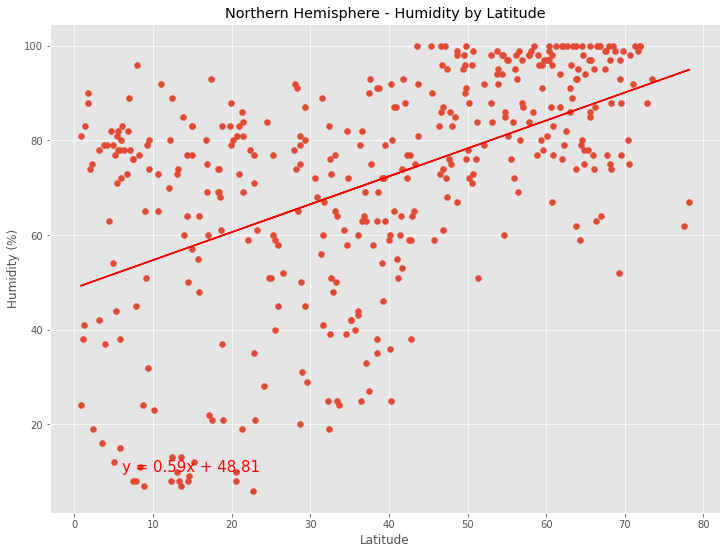

In [73]:
# Perform Regression and Plot Results

x_values = north_cities["latitude"] 
y_values = north_cities["humidity"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Print the Regression formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere - Humidity by Latitude")

plt.savefig("North Humidity VS Lat Reg.png")
 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

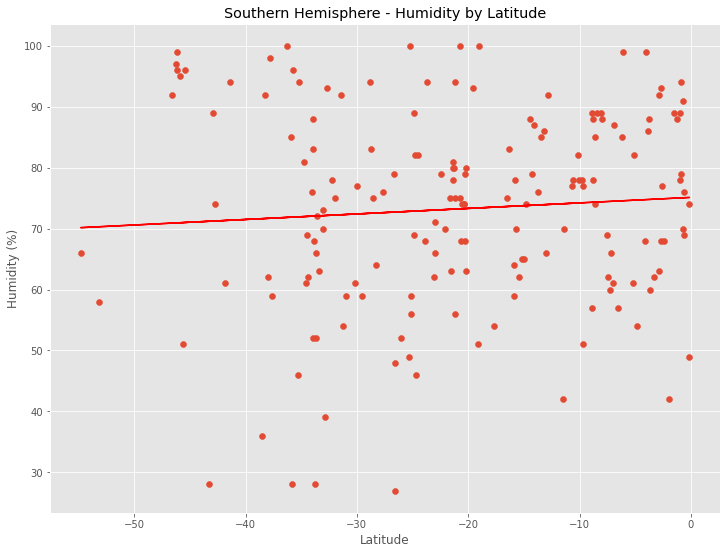

In [74]:
# Perform Regression and Plot Results

x_values = south_cities["latitude"] 
y_values = south_cities["humidity"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Print the Regression formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere - Humidity by Latitude")

plt.savefig("South Humidity VS Lat Reg.png")

In [ ]:
# There is very little correlation between latitude and humidity in either Humidity/Latitude chart.  While there appears to be some
# sort of unusual grouping at high latitudes in the North, as discussed above, this is explained by the fact that
# the potential amount of water air can hold is lower at lower temperatures so the denominator in the 
# relative humidity equation is decreasing as the latitude increases which causes the results to move toward
# 100% at low temperatures.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

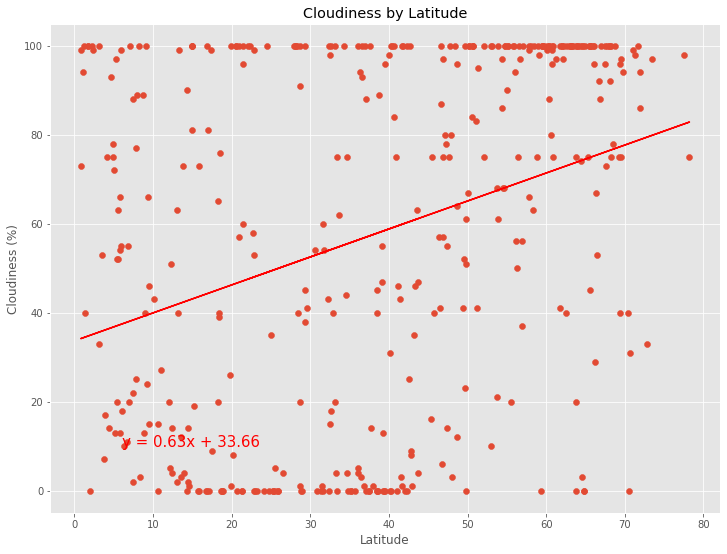

In [55]:
# Perform Regression and Plot Results

x_values = north_cities["latitude"] 
y_values = north_cities["cloudiness"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Print the Regression formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Cloudiness by Latitude")

plt.savefig("North Cloud VS Lat Reg.png")
 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

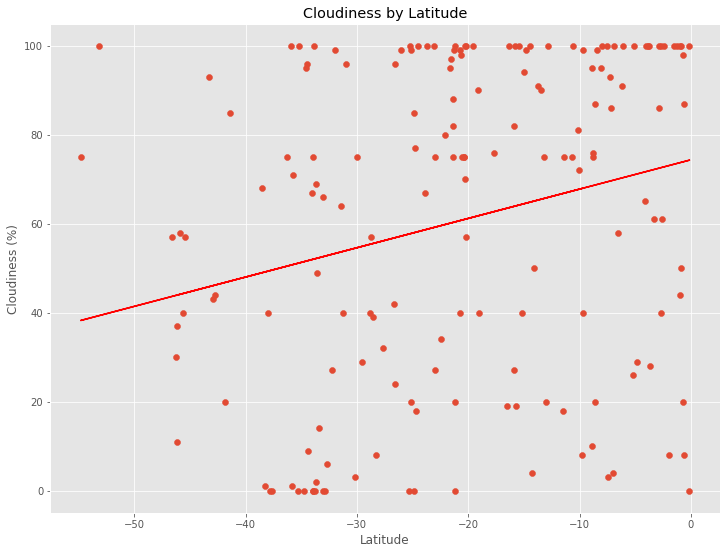

In [57]:
# Perform Regression and Plot Results

x_values = south_cities["latitude"] 
y_values = south_cities["cloudiness"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Print the Regression formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Cloudiness by Latitude")

plt.savefig("South Clouds VS Lat Reg.png")

In [ ]:
#  There appears to be little correlation between cloudiness and latitude in either hemisphere.  As discussed before,
#  there is some clustering of resulting on the boundaries given the tendencies for very high pressure days to have no
#  clouds and very low pressure days to be 100% cloudy.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

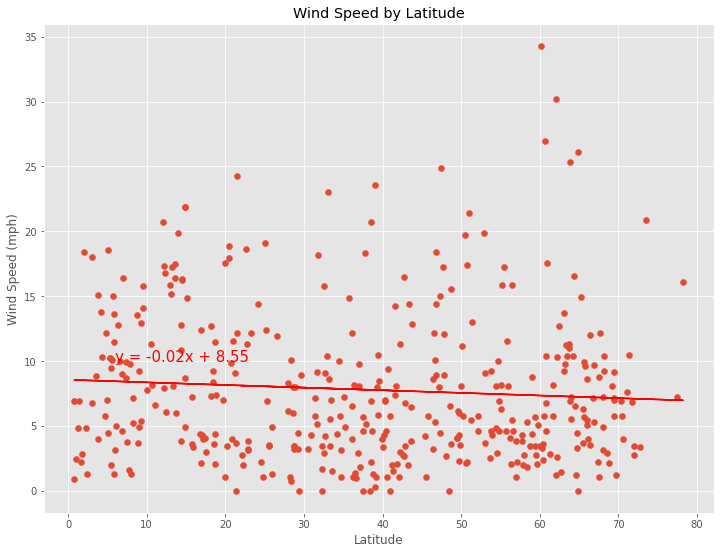

In [58]:
# Perform Regression and Plot Results

x_values = north_cities["latitude"] 
y_values = north_cities["windspeed"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Print the Regression formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Northern Hemisphere - Wind Speed by Latitude")

plt.savefig("North Wind VS Lat Reg.png")
 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

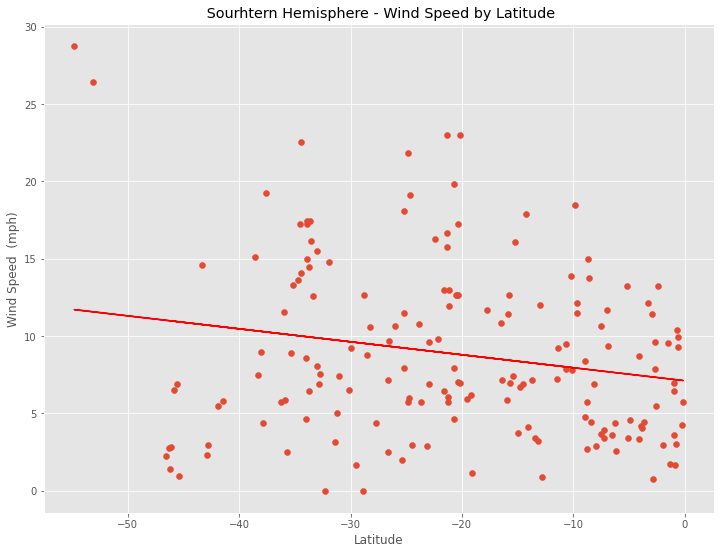

In [77]:
# Perform Regression and Plot Results

x_values = south_cities["latitude"] 
y_values = south_cities["windspeed"]  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Print the Regression formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed  (mph)")
plt.title(f" Sourhtern Hemisphere - Wind Speed by Latitude")

plt.savefig("South Wind VS Lat Reg.png")

In [ ]:
# There appears to be very litte correlation between Wind Speed and Latitude in either hemisphere.  Winds do tend to 
# range between 0 and 10 miles per hour in both hemispheres.